In [1]:
#Importing Google Drive to access Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.metrics import (classification_report, confusion_matrix , accuracy_score, precision_score,auc,classification_report,
                             recall_score,precision_recall_curve,average_precision_score,plot_precision_recall_curve,f1_score)
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
import matplotlib.pyplot as plt 
from xgboost import XGBClassifier
from datetime import datetime
from collections import Counter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# **LOADING DATASET**

In [5]:
data = pd.read_csv("/content/drive/My Drive/Projects/Lending Club/lcData6m.csv",low_memory=False)

In [6]:
data.info(),data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120791 entries, 0 to 120790
Columns: 145 entries, id to settlement_term
dtypes: float64(79), int64(41), object(25)
memory usage: 133.6+ MB


(None, (120791, 145))

# **DATA ANALYSIS**


In [7]:
data.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage
count,0.0,0.0,120791.000000,120791.000000,120791.000000,120791.000000,120791.000000,1.207910e+05,0.0,0.0,120791.000000,120791.000000,120791.000000,62925.000000,22598.000000,120791.000000,120791.000000,1.207910e+05,120743.000000,120791.000000,120791.000000,120791.000000,120791.000000,120791.000000,120791.000000,120791.000000,1.207910e+05,120791.000000,120791.000000,120791.000000,120791.000000,36241.000000,120791.0,0.0,0.0,0.0,120791.000000,120791.000000,1.207910e+05,0.0,...,120791.000000,120791.000000,120791.000000,120791.000000,119494.000000,120791.000000,120791.000000,1.207910e+05,1.207910e+05,120791.000000,120791.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,12786.448287,12786.448287,12783.672468,11.507927,420.864632,7.295015e+04,NaN,NaN,18.476351,0.350539,0.585722,33.988113,67.041198,11.591559,0.249588,1.592036e+04,53.380312,24.787434,0.004054,0.004054,13656.110118,13653.128781,11690.745952,1819.731049,1.398891e+00,144.234219,25.846215,3419.825983,0.019654,43.456224,1.0,NaN,NaN,NaN,0.006631,273.866356,1.257949e+05,NaN,...,0.003982,0.100852,2.168150,93.700246,47.240954,0.141219,0.068995,1.566049e+05,4.777861e+04,20251.372089,39785.726139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7922.284250,7922.284250,7920.687270,3.751527,262.470771,6.412268e+04,NaN,NaN,8.599109,0.942434,0.878231,21.929187,26.919116,5.507671,0.666263,2.342964e+04,23.722584,12.069579,1.408920,1.408920,9112.045929,9110.218270,8020.268066,1527.588701,9.959174e+00,667.945394,119.941167,4979.647173,0.159043,21.178463,0.0,NaN,NaN,NaN,0.097561,2456.061364,1.500334e+05,NaN,...,0.067422,0.552152,1.828484,9.054265,35.996101,0.398369,0.452578,1.725046e+05,4.777053e+04,21239.419341,42211.916872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1000.000000,1000.000000,975.000000,5.320000,14.010000,3.000000e+03,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.100000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00,NaN,...,0.000000,0.000000,0.000000,7.700000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7000.000000,7000.000000,7000.000000,8.180000,226.230000,4.300000e+

In [8]:
data["loan_status"].value_counts()

Fully Paid     102521
Charged Off     18269
Current             1
Name: loan_status, dtype: int64

I droped the current status as, I am only interested in Fully paid and Charged off

In [9]:
data = data[data.loan_status != "Current"]

data distributed based on grade

In [10]:
data.groupby(["loan_status","grade"])["grade"].count()

loan_status  grade
Charged Off  A         1770
             B         4324
             C         6388
             D         4007
             E         1486
             F          261
             G           33
Fully Paid   A        28855
             B        31422
             C        27293
             D        11382
             E         3140
             F          367
             G           62
Name: grade, dtype: int64

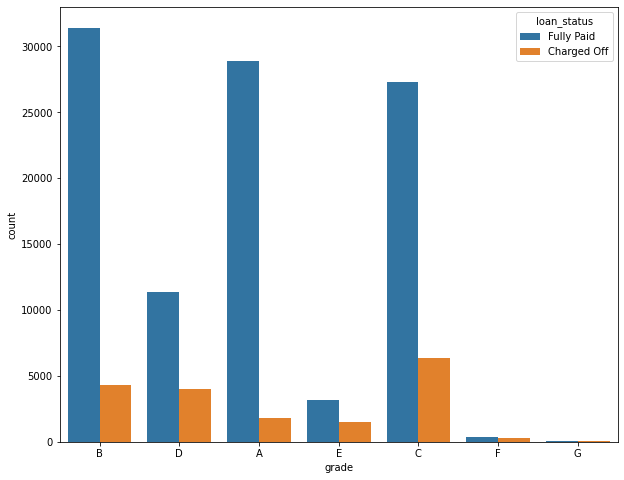

In [11]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="grade", hue="loan_status", data=data )

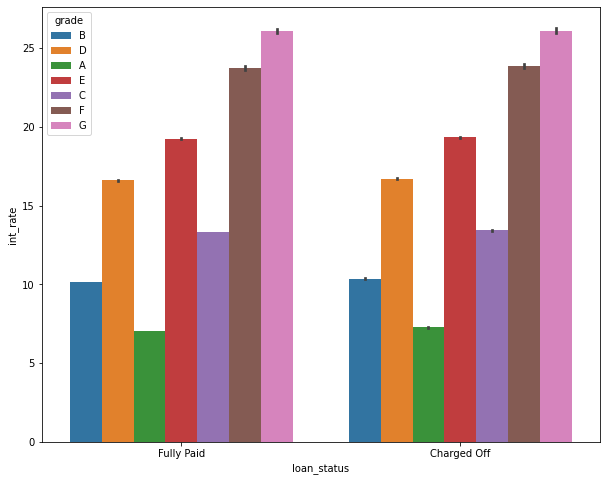

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x="loan_status",y= "int_rate",hue = "grade",data=data)

Grade and Interest rate interaction

In [13]:
data.groupby(["loan_status","grade"])["int_rate"].mean()
#Interest rate increases as we move along the categories

loan_status  grade
Charged Off  A         7.272836
             B        10.368763
             C        13.421129
             D        16.696741
             E        19.324569
             F        23.839923
             G        26.105758
Fully Paid   A         7.015656
             B        10.136377
             C        13.309681
             D        16.603213
             E        19.232608
             F        23.718229
             G        26.091290
Name: int_rate, dtype: float64

In [14]:
data.groupby(["loan_status","grade","sub_grade"])["sub_grade"].count()

loan_status  grade  sub_grade
Charged Off  A      A1           103
                    A2           192
                    A3           252
                    A4           448
                    A5           775
                                ... 
Fully Paid   F      F5            29
             G      G1            25
                    G2            18
                    G3            13
                    G4             6
Name: sub_grade, Length: 69, dtype: int64

Grade is further divided into subgrade. 
Different categories fo Subgrade

In [15]:
data["sub_grade"].value_counts()

A5    9485
B5    8085
C1    7896
C2    7605
A4    7247
B4    7192
B3    7121
B2    7001
C3    6883
B1    6347
C4    6002
C5    5295
A2    5027
A3    4831
D1    4364
A1    4035
D2    3437
D3    3102
D4    2366
D5    2120
E1    1557
E2    1151
E3     933
E4     583
E5     402
F1     239
F2     155
F3     102
F4      79
F5      53
G1      37
G2      29
G3      19
G4       8
G5       2
Name: sub_grade, dtype: int64

In [16]:
data.groupby(["loan_status","sub_grade"])["int_rate"].mean()
#interest rate also increases within sub_grade category

loan_status  sub_grade
Charged Off  A1            5.687864
             A2            6.379323
             A3            6.797619
             A4            7.108683
             A5            7.954258
                            ...    
Fully Paid   F5           25.620690
             G1           26.110400
             G2           25.994444
             G3           26.043077
             G4           26.406667
Name: int_rate, Length: 69, dtype: float64

Different categories of Subgrade

In [17]:
data["purpose"].value_counts()

debt_consolidation    71988
credit_card           28495
home_improvement       6631
other                  6031
major_purchase         2046
car                    1151
medical                1150
small_business         1056
moving                  866
vacation                857
house                   441
renewable_energy         75
wedding                   2
educational               1
Name: purpose, dtype: int64

Loan Status and Purpose interaction

In [18]:
data.groupby(["loan_status","purpose"])["purpose"].count()
#maxmimum charged off is for debt consolidation which is 3 times more than second best for cc

loan_status  purpose           
Charged Off  car                     149
             credit_card            3551
             debt_consolidation    11472
             home_improvement        880
             house                    91
             major_purchase          307
             medical                 203
             moving                  178
             other                  1034
             renewable_energy         18
             small_business          244
             vacation                142
Fully Paid   car                    1002
             credit_card           24944
             debt_consolidation    60516
             educational               1
             home_improvement       5751
             house                   350
             major_purchase         1739
             medical                 947
             moving                  688
             other                  4997
             renewable_energy         57
             small_busine

Both have almost same number of loans

#### Grade and Interest rate with loan amount interaction

In [19]:
data.groupby(["loan_status","purpose"])["loan_amnt"].mean()

loan_status  purpose           
Charged Off  car                    9114.932886
             credit_card           13189.073500
             debt_consolidation    12756.339348
             home_improvement      12965.965909
             house                 11939.010989
             major_purchase        11130.700326
             medical                7513.916256
             moving                 7691.292135
             other                  8913.902321
             renewable_energy       8677.777778
             small_business        15105.430328
             vacation               6519.718310
Fully Paid   car                    7999.251497
             credit_card           13944.162925
             debt_consolidation    13198.375636
             educational            2200.000000
             home_improvement      12169.527039
             house                 12244.000000
             major_purchase        10303.982174
             medical                7489.836325
        

In [20]:
data["annual_ret"] = ((data["total_pymnt"] - data["funded_amnt"])/data["funded_amnt"])/(12/36)*100
#total_pymnt =	Payments received to date for total amount funded
#funded_amnt =	The total amount committed to that loan at that point in time

In [21]:
data.groupby(["loan_status","annual_ret"])["annual_ret"].count()

loan_status  annual_ret 
Charged Off  -300.000000    11
             -295.167679     1
             -292.725857     1
             -291.003200     1
             -290.822000     1
                            ..
Fully Paid    139.408515     1
              140.806142     1
              143.129212     1
              145.868084     1
              162.299152     1
Name: annual_ret, Length: 114385, dtype: int64

In [22]:
data["last_pymnt_d"]

0         Mar-2016
1         Sep-2016
2         Sep-2016
3         Jan-2018
4         Jun-2018
            ...   
120786    Sep-2016
120787    Feb-2016
120788    Jan-2018
120789    Feb-2018
120790    May-2017
Name: last_pymnt_d, Length: 120790, dtype: object

# **DATA ENGENERING AND WRANGLING**

Converting date to datetype

In [23]:
data['last_pymnt_d']=data['last_pymnt_d'].astype(str) + '-01'
data['last_pymnt_d']=pd.to_datetime(data['last_pymnt_d'],format='%b-%Y-%d',errors='coerce')


data['issue_d']=data["issue_d"].str.replace("T00:00:00Z", "")
data['issue_d']=pd.to_datetime(data['issue_d'],format='%Y-%m-%d',errors='coerce')

Getting Acutal Term

In [24]:
data["actual_term"] = (data["last_pymnt_d"] - data["issue_d"])

In [25]:
data["actual_term"] = data["actual_term"].dt.days/365

In [26]:
data["actual_term"]

0         0.750685
1         1.254795
2         1.254795
3         2.589041
4         3.002740
            ...   
120786    1.668493
120787    1.084932
120788    3.002740
120789    3.087671
120790    2.331507
Name: actual_term, Length: 120790, dtype: float64

In [27]:
data['actual_term'] = np.where(data['loan_status'] != 'Fully Paid', 3.0, data['actual_term'])
data[{'loan_status','actual_term'}]

,actual_term,loan_status
0,0.750685,Fully Paid
1,3.000000,Charged Off
2,3.000000,Charged Off
3,2.589041,Fully Paid
4,3.002740,Fully Paid
...,...,...
120786,1.668493,Fully Paid
120787,3.000000,Charged Off
120788,3.002740,Fully Paid
120789,3.087671,Fully Paid


Deriving Actual Return

In [28]:
data['actual_return'] = ((data['total_pymnt'] - data['funded_amnt'])/data['funded_amnt'])*(1/data['actual_term'])*100
data['actual_return']

0          9.300395
1        -16.464684
2        -10.931667
3          4.771663
4          4.190869
            ...    
120786    12.435996
120787   -18.986750
120788     6.484891
120789     6.293425
120790     8.010670
Name: actual_return, Length: 120790, dtype: float64

In [29]:
data.shape

(120790, 148)

### **Handling Missing Data**

REMOVING COLUMNS WITH MORE THAN 45% DATA MISSING

In [30]:
data = data.loc[:,data.isnull().mean() < 0.45]

#Columns with null values
null_columns = []
for column in data:
    if data[column].isnull().any():
       null_columns.append(column)
       print('Percentage of null values in {0} is {1} %'.format(column, round(data[column].isnull().mean()*100,2)))

Percentage of null values in emp_title is 6.25 %
Percentage of null values in emp_length is 6.23 %
Percentage of null values in revol_util is 0.04 %
Percentage of null values in last_pymnt_d is 0.06 %
Percentage of null values in last_credit_pull_d is 0.0 %
Percentage of null values in bc_open_to_buy is 1.02 %
Percentage of null values in bc_util is 1.09 %
Percentage of null values in mo_sin_old_il_acct is 3.67 %
Percentage of null values in mths_since_recent_bc is 0.97 %
Percentage of null values in mths_since_recent_inq is 10.65 %
Percentage of null values in num_tl_120dpd_2m is 3.54 %
Percentage of null values in percent_bc_gt_75 is 1.07 %
Percentage of null values in actual_return is 0.0 %


In [31]:
data.shape


(120790, 90)

In [32]:
#data = data.drop(["emp_length","emp_title"],axis = 1)

### 89 predictors

### Replacing missing data with mode and mean of the column

In [33]:
data['bc_util'] = data['bc_util'].fillna((data['bc_util'].mode()))
data['revol_util'] = data['revol_util'].fillna((data['revol_util'].mean()))
data['bc_open_to_buy'] = data['bc_open_to_buy'].fillna((data['bc_open_to_buy'].mean()))
data['bc_util'] = data['bc_util'].fillna((data['bc_util'].mean()))
data['mo_sin_old_il_acct'] = data['mo_sin_old_il_acct'].fillna((data['mo_sin_old_il_acct'].mean()))
data['mths_since_recent_bc'] = data['mths_since_recent_bc'].fillna((data['mths_since_recent_bc'].mean()))
data['mths_since_recent_inq'] = data['mths_since_recent_inq'].fillna((data['mths_since_recent_inq'].mean()))
data['percent_bc_gt_75'] = data['percent_bc_gt_75'].fillna((data['percent_bc_gt_75'].mean()))

In [34]:
null_columns = []
for column in data:
    if data[column].isnull().any():
       null_columns.append(column)
       print('Percentage of null values in {0} is {1} %'.format(column, round(data[column].isnull().mean()*100,2)))

Percentage of null values in emp_title is 6.25 %
Percentage of null values in emp_length is 6.23 %
Percentage of null values in last_pymnt_d is 0.06 %
Percentage of null values in last_credit_pull_d is 0.0 %
Percentage of null values in num_tl_120dpd_2m is 3.54 %
Percentage of null values in actual_return is 0.0 %


In [36]:
data.groupby("loan_status")["loan_status"].count()

loan_status
Charged Off     18269
Fully Paid     102521
Name: loan_status, dtype: int64

### Droping varibles which are not available at the time of application of a loan, variable with no variance within the variable

In [37]:
data = data.drop(["annual_ret","actual_return","recoveries","collection_recovery_fee","actual_term","issue_d","earliest_cr_line","pymnt_plan","out_prncp","policy_code","application_type","hardship_flag","disbursement_method","last_pymnt_d","last_credit_pull_d","total_rec_prncp","debt_settlement_flag","term","total_pymnt","total_pymnt_inv","emp_length","last_pymnt_amnt","num_tl_120dpd_2m"],axis = 1)

FINDING CORELATION WITH LOAN_STATUS

In [38]:
data['loan_status']=data['loan_status'].astype('category').cat.codes
correlation=data[data.columns[1:]].corr().abs()['loan_status'][:].sort_values(ascending=False)
print(correlation[:30])

loan_status              1.000000
int_rate                 0.221165
total_rec_late_fee       0.116784
acc_open_past_24mths     0.107781
num_tl_op_past_12m       0.097584
dti                      0.085629
total_bc_limit           0.084242
tot_hi_cred_lim          0.083235
inq_last_6mths           0.082391
bc_open_to_buy           0.080680
avg_cur_bal              0.078106
tot_cur_bal              0.076399
mort_acc                 0.073094
mo_sin_rcnt_tl           0.063208
mo_sin_rcnt_rev_tl_op    0.061228
percent_bc_gt_75         0.060240
mths_since_recent_bc     0.059630
mo_sin_old_rev_tl_op     0.058799
mths_since_recent_inq    0.057039
bc_util                  0.055087
num_actv_rev_tl          0.053107
num_rev_tl_bal_gt_0      0.052602
total_rev_hi_lim         0.052033
annual_inc               0.046814
revol_util               0.040190
mo_sin_old_il_acct       0.039771
revol_bal                0.036605
pub_rec_bankruptcies     0.032078
total_rec_int            0.030470
pub_rec       

In [39]:
data["title"].value_counts()

Debt consolidation                         71963
Credit card refinancing                    28515
Home improvement                            6624
Other                                       6042
Major purchase                              2040
Car financing                               1155
Medical expenses                            1149
Business                                    1052
Moving and relocation                        869
Vacation                                     856
Home buying                                  441
Green loan                                    76
New Baby and New House (CC Consolidate)        1
new kitchen for momma!                         1
Trying to come back to reality!                1
Prescription Drug and Medical Costs            1
Pay off Lowes Card                             1
Simple Loan Until Contract Is Completed        1
Paying off higher interest cards & auto        1
Learning and training                          1
Name: title, dtype: 

In [40]:
data = data.drop(data[data["title"] == "Prescription Drug and Medical Costs"].index)
data = data.drop(data[data["title"] == "Trying to come back to reality!"].index)
data = data.drop(data[data["title"] == "Paying off higher interest cards & auto"].index)
data = data.drop(data[data["title"] == "Simple Loan Until Contract Is Completed"].index)
data = data.drop(data[data["title"] == "Learning and training"].index)
data = data.drop(data[data["title"] == "new kitchen for momma!"].index)
data = data.drop(data[data["title"] == "Pay off Lowes Card"].index)
data = data.drop(data[data["title"] == "New Baby and New House (CC Consolidate)"].index)

In [41]:
#data = data.drop(["total_pymnt_inv","last_pymnt_d","num_tl_30dpd","debt_settlement_flag","issue_d","zip_code","total_rec_prncp","total_pymnt","funded_amnt","total_rec_late_fee","last_credit_pull_d","last_pymnt_amnt","total_rec_int"],axis = 1)

### Handling Categorical Variables

In [42]:
le = LabelEncoder()
le.fit(data['grade'].astype(str))
data['grade']=le.transform(data['grade'].astype(str))


le.fit(data['sub_grade'].astype(str))
data['sub_grade']=le.transform(data['sub_grade'].astype(str))


le.fit(data['home_ownership'].astype(str))
data['home_ownership']=le.transform(data['home_ownership'].astype(str))


le.fit(data['verification_status'].astype(str))
data['verification_status']=le.transform(data['verification_status'].astype(str))


le.fit(data['purpose'].astype(str))
data['purpose']=le.transform(data['purpose'].astype(str))



le.fit(data['initial_list_status'].astype(str))
data['initial_list_status']=le.transform(data['initial_list_status'].astype(str))


le.fit(data['addr_state'].astype(str))
data['addr_state']=le.transform(data['addr_state'].astype(str))

le.fit(data['title'].astype(str))
data['title']=le.transform(data['title'].astype(str))

le.fit(data['zip_code'].astype(str))
data['zip_code']=le.transform(data['zip_code'].astype(str))

le.fit(data['emp_title'].astype(str))
data['emp_title']=le.transform(data['emp_title'].astype(str))

In [44]:
data.groupby("loan_status")["loan_status"].count()

loan_status
0     18267
1    102515
Name: loan_status, dtype: int64

#Fully paid = 1
#Charged off = 0

In [46]:
data.shape


(120782, 67)

66 Predictors 

# **DATA MODELING**

Dividing data in predictors and target variable and then in train test split

In [48]:
Y = data["loan_status"]
#Y=pd.DataFrame(Y)
X = data.drop(["loan_status"],axis = 1)

In [49]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((84547, 65), (36235, 65), (84547,), (36235,))

In [51]:
counter = Counter(y_train)
print(counter)

Counter({1: 71762, 0: 12785})


### **OVERSAMPLING**
There's a class imbalance in the dataset. I have used SMOTE technique to balance that on the training data.

In [52]:
smote = SMOTE(sampling_strategy = "auto",random_state=42)
X_sm, y_sm = smote.fit_sample(X_train, y_train.ravel())
X_sm = pd.DataFrame(X_sm)
#y_sm = pd.DataFrame(y_sm)
X_sm.columns  = X.columns
#y_sm.columns = ["loan_status"]
X_train = X_sm
y_train = y_sm

#### Training data is balanced 

In [53]:
counter = Counter(y_train)
print(counter)

Counter({1: 71762, 0: 71762})


Testing data in not balanced, and will be used for model evaluation

In [54]:
counter = Counter(y_test)
print(counter)

Counter({1: 30753, 0: 5482})


# **Decision Tree Model**

In [55]:
X_train_dt,X_test_dt ,y_train_dt,y_test_dt = X_train,X_test,y_train, y_test

In [56]:
X_train_dt.shape,y_train_dt.shape,X_test_dt.shape,y_test_dt.shape

((143524, 65), (143524,), (36235, 65), (36235,))

In [57]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_dt, y_train_dt)

In [58]:
y_pred_train_dt = clf.predict(X_train_dt)
y_pred_test_dt = clf.predict(X_test_dt)

In [59]:
print("Confusion Matrix of train set: \n",confusion_matrix( y_true = y_train_dt, y_pred = y_pred_train_dt))
print("Confusion Matrix of train set: \n",confusion_matrix( y_true = y_test, y_pred = y_pred_test_dt))

Confusion Matrix of train set: 
 [[71762     0]
 [    0 71762]]
Confusion Matrix of train set: 
 [[ 1623  3859]
 [ 4622 26131]]


In [60]:
print("Recall on train set: ",recall_score(y_true = y_train_dt, y_pred = y_pred_train_dt)*100)
print("Recall on test set: ",recall_score(y_true = y_test, y_pred = y_pred_test_dt)*100)

Recall on train set:  100.0
Recall on test set:  84.97057197671772


In [61]:
print("Precision on train set: ",precision_score(y_true = y_train_dt, y_pred = y_pred_train_dt)*100)
print("Precision on test set: ",precision_score(y_true = y_test, y_pred = y_pred_test_dt)*100)

Precision on train set:  100.0
Precision on test set:  87.13237745915305


In [62]:
print("Accuracy on train set: ",accuracy_score(y_true = y_train_dt, y_pred = y_pred_train_dt)*100)
print("Accuracy on test set: ",accuracy_score(y_true = y_test, y_pred = y_pred_test_dt)*100)

Accuracy on train set:  100.0
Accuracy on test set:  76.59445287705257


# As the dataset in highly imbalanced, I have used **PR curve and F1 score** for model evaluation

#### Precision - Recall Curve for Decision Tree Model

In [63]:
average_precision = average_precision_score(y_true=y_test, y_score=y_pred_test_dt)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.87


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.87')

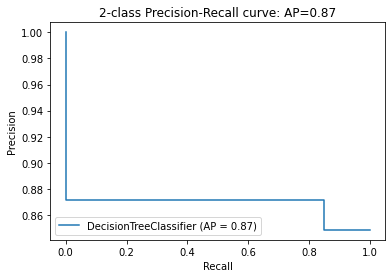

In [64]:
disp = plot_precision_recall_curve(clf, X_test_dt, y_test_dt)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

This graph shows that the model is not predicting well

In [65]:
precision, recall, _ = precision_recall_curve(y_test_dt,y_pred_test_dt)
auc_score = auc(recall, precision)
print('DT PR AUC: %.3f' % auc_score)

DT PR AUC: 0.924


In [91]:
print("f1 score for decision tree model is: ",f1_score(y_true = y_test, y_pred = y_pred_test_dt))

f1 score for decision tree model is:  0.8603789737089047


# **Random Forest**

In [67]:
X_train_rf,X_test_rf,y_train_rf, y_test_rf = X_train_dt,X_test_dt ,y_train_dt,y_test_dt 


In [68]:
rf = RandomForestClassifier(n_estimators=100) 
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
y_pred_train_rf = rf.predict(X_train_rf)
y_pred_test_rf = rf.predict(X_test_rf)

In [70]:
print("Confusion Matrix of train set: \n",confusion_matrix( y_true = y_train_rf, y_pred = y_pred_train_rf))
print("Confusion Matrix of train set: \n",confusion_matrix( y_true = y_test_rf, y_pred = y_pred_test_rf))

Confusion Matrix of train set: 
 [[71762     0]
 [    0 71762]]
Confusion Matrix of train set: 
 [[  533  4949]
 [  493 30260]]


In [71]:
print("Recall on train set: ",recall_score( y_true = y_train_rf, y_pred = y_pred_train_rf )*100)
print("Recall on test set: ",recall_score( y_true = y_test_rf, y_pred = y_pred_test_rf )*100)

Recall on train set:  100.0
Recall on test set:  98.39690436705362


In [72]:
print("Precision on train set: ",precision_score( y_true = y_train_rf, y_pred = y_pred_train_rf )*100)
print("Precision on test set: ",precision_score( y_true = y_test_rf, y_pred = y_pred_test_rf )*100)

Precision on train set:  100.0
Precision on test set:  85.94393478940043


In [73]:
print("Accuracy on train set: ",accuracy_score(y_true = y_train_rf, y_pred = y_pred_train_rf)*100)
print("Accuracy on test set: ",accuracy_score(y_true = y_test_rf, y_pred = y_pred_test_rf)*100)

Accuracy on train set:  100.0
Accuracy on test set:  84.98137160204222


#### Precision - Recall Curve for Random Forest Model

In [74]:
average_precision = average_precision_score(y_true=y_test_rf, y_score=y_pred_test_rf)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.86


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

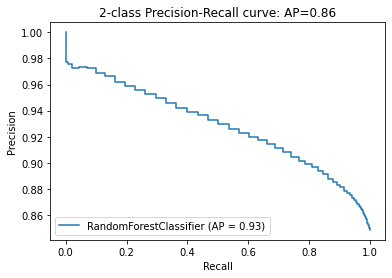

In [75]:
disp = plot_precision_recall_curve(rf, X_test_rf, y_test_rf)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

This graph shows random forest is predicting better than DT

In [76]:
precision, recall, _ = precision_recall_curve(y_test_rf,y_pred_test_rf )
auc_score = auc(recall, precision)
print('Random Forest PR AUC: %.3f' % auc_score)

Random Forest PR AUC: 0.929


In [92]:
print("f1 score for random forest model is: ",f1_score(y_true = y_test_rf, y_pred = y_pred_test_rf))

f1 score for random forest model is:  0.9174979533670901


### **F1 score of RF model is higher than DT model**

# **XGBOOST**

In [78]:
X_train_xg,X_test_xg,y_train_xg, y_test_xg = X_train_dt,X_test_dt ,y_train_dt,y_test_dt 

In [79]:
model = XGBClassifier(booster='gbtree', n_estimators=300,subsample=0.6,
                        objective='binary:logistic', random_state=42)
model.fit(X_train_xg, y_train_xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [80]:
y_pred_train_xg = model.predict(X_train_xg)

In [81]:
y_pred_test_xg = model.predict(X_test_xg)

In [82]:
print("Confusion Matrix of train set: \n",confusion_matrix( y_true = y_train_xg, y_pred = y_pred_train_xg))
print("Confusion Matrix of train set: \n",confusion_matrix( y_true = y_test_xg, y_pred = y_pred_test_xg))

Confusion Matrix of train set: 
 [[60864 10898]
 [ 1038 70724]]
Confusion Matrix of train set: 
 [[  775  4707]
 [  511 30242]]


In [83]:
print("Recall on train set: ",recall_score( y_true = y_train_xg, y_pred = y_pred_train_xg )*100)
print("Recall on test set: ",recall_score( y_true = y_test_xg, y_pred = y_pred_test_xg )*100)

Recall on train set:  98.55355201917449
Recall on test set:  98.33837349201704


In [84]:
print("Precision on train set: ",precision_score( y_true = y_train_xg, y_pred = y_pred_train_xg )*100)
print("Precision on test set: ",precision_score( y_true = y_test_xg, y_pred = y_pred_test_xg )*100)

Precision on train set:  86.64820759109064
Precision on test set:  86.53180348507826


In [85]:
print("Accuracy on train set: ",accuracy_score( y_true = y_train_xg, y_pred = y_pred_train_xg )*100)
print("Accuracy on test set: ",accuracy_score( y_true = y_test_xg, y_pred = y_pred_test_xg )*100)

Accuracy on train set:  91.68362085783562
Accuracy on test set:  85.59955843797434


In [86]:
average_precision = average_precision_score(y_true=y_test_xg, y_score=y_pred_test_xg)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.87


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.87')

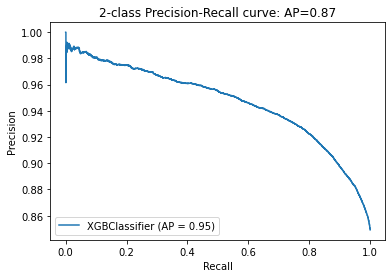

In [87]:
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

### **XGBoost model PR curve shows it is better than both DT and RF model**

In [88]:
precision, recall, _ = precision_recall_curve(y_test_xg,y_pred_test_xg )
auc_score = auc(recall, precision)
print('XGBoost PR AUC: %.3f' % auc_score)

XGBoost PR AUC: 0.931


In [93]:
print("f1 score for xgboost model is: ",f1_score(y_true = y_test_xg, y_pred = y_pred_test_xg))

f1 score for xgboost model is:  0.9205808042373139


### **F1 score of XG model is higher than both DT and RF model**